# Non-linear Interpretability

The key to interpretable machine learning

1. explanation should be interpretable
2. number of explanations should be low (low entropy on possible explanations)

Assume $D = \{(x_i, y_i)\}_{i=1}^{|D|}$, then we have the following optimization function (denote $z$ as explanation)

$cost(D) = \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)$

where $x$ is the input, $y$ is the output, $L$ is the data loss function, and $\mathcal{H}(z)$ is entropy and $\alpha>0$ is tradeoff parameter

Based on this design guideline, we propose the following generalized linear interpretable model:

![model_pipeline](presentations/unifiying_view_credibility.png )

The model has two components, the switch network (parametrized by $\theta_s$ and output explanation probability $p(z|x)$) and the weight network (parametrized by $\theta_w$ and output parameters of an interpretable model f). 

Assuming the switch network and the function network are differentiable, we can derive the update gradient for $\theta_s$ and $\theta_w$.

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_s} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{x,y,z} p(x,y) p(z|x) L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \sum_{z} L(x, y, z) \frac{ \partial p(z|x)}{\partial \theta_s} + \alpha  \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} + \alpha \frac{\partial \mathcal{H}(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \frac{\partial \sum_{z} p(z) \log p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) \frac{\partial p(z)}{\partial \theta_s} + p(z) \frac{\partial \log p(z)}{\partial \theta_s}) \\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial p(z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y,z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \frac{\partial \sum_{x,y} p(x,y)p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{z} (\log p(z) + 1) \sum_{x,y} p(x,y) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \sum_{x,y} p(x,y) \sum_{z} (\log p(z) + 1) \frac{\partial p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y} \mathbb{E}_{z|x} L(x, y, z) \frac{\partial \log p(z|x)}{\partial \theta_s} - \alpha \mathbb{E}_{x,y} \mathbb{E}_{z|x} (\log p(z) + 1) \frac{\partial \log p(z|x)}{\partial \theta_s}\\
    &= \mathbb{E}_{x,y}\mathbb{E}_{z|x} (L(x, y, z) - \alpha \log p(z) - \alpha) \frac{\partial \log p(z|x)}{\partial \theta_s}
\end{align}

\begin{align}
    \frac{\partial{cost(D)}}{\partial \theta_w} &= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z) + \alpha \mathcal{H}(z)}{\partial \theta_w}\\
&= \frac{\partial \mathbb{E}_{x,y,z} L(x, y, z)}{\partial \theta_w}\\
&= \mathbb{E}_{x,y,z} \frac{\partial L(x, y, z)}{\partial \theta_w}
\end{align}

## design choices

For simplicty, we only consider a line as the output of the weight network. We could try other atomic structures such as  circle 

We consider 3 variant  of the switch network (assuming $z \in \mathbb{R}^K$)

1. the last layer of the switch network is a softmax ($z$ being a one hot vector)
2. the last layer of the switch network is multiple sigmoid functions ($p(z|x) = \Pi_{k=1}^K p(z_k|x)$)
3. the switch network is implemented by an rnn ($p(z|x) = \Pi_{k=1}^K p(z_k|x,z_{1:k-1})$)

Obviously, variant 3 is the most general because it computes the full probability while variant 2 assumes digits of z  are independently generated given the input. Variant 1 is also general but it can only hold $K$ explanations, whereas the other two can hold $2^K$ number of explanations so that they are more memory efficient.

We consider the following environment to run our experiment

- Triangle world (to test a world where only 3 line suffices)
- Egg world (to test a world where potentially infinite lines are needed)
- Island in the sea (to fail input gradient)
- Big and small islands (to fail counterfactual explanation)
- Randomly many islands (to get intuition on the model)


## interesting observations

The current model has the following properties

1. low number of explanations
2. $f_i$ are interpretable for $i\in\{0 \cdots K\}$ 

Though this looks good, it does not give the intended effect. Why is that?

Define $X_{f_i} := \{x \in \mathcal{X}: arg\max_i p(z_i|x)\}$ partitions input space $\mathcal{X}$

The problem is $y_{f_i}$ may only contain one class so that it is trivial for $\theta_w$ (have arbitrarily non interpretable model to classify) to correctly label data.

Another issue is the cluster (switch) assignment may not be local in the original input space. We cannot force $X_{f_i}$ to be continuous. The only hope for continuous input space is for the switch network to be simple.

We can solve problem 1 by adding $-\beta H(y|z)$ to the cost function. For problem 2, we need to think carefully (assign points to the nearest classifier does not work: try the triangle environment)


\begin{align}
    -\frac{\partial H(y|z)}{\partial \theta_s} &= \frac{\partial \mathbb{E}_z \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \frac{\partial \sum_{z} \sum_{x} p(z|x) p(x) \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \frac{\partial \mathbb{E}_{x} \sum_{z} p(z|x) \sum_{y} p(y|z) \log p(y|z)}{\partial \theta_s}\\
    &= \mathbb{E}_{x} \sum_{z} \sum_{y} p(y|z) \log p(y|z) \frac{\partial  p(z|x) }{\partial \theta_s}\\
    &= \mathbb{E}_{x} \mathbb{E}_{z|x} \sum_{y} p(y|z) \log p(y|z) \frac{\partial  \log p(z|x) }{\partial \theta_s}
\end{align}

\begin{align}
    -\frac{\partial H(y|z)}{\partial \theta_w} = 0
\end{align}



In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn as sns
from lib.train import InterpretableTrainer
from torch.utils.data import Dataset, DataLoader, TensorDataset
from lib.model import Switch, Weight, apply_linear
from lib.utility import logit_elementwise_loss
from lib.utility import plotDecisionSurface, to_var, to_np, check_nan

## triangle world

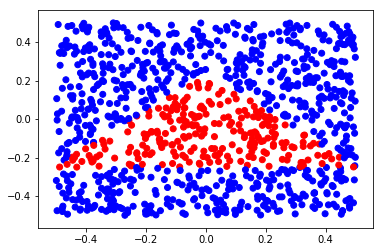

In [3]:
def build_triangle(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[1,1,-0.25], [-1, 1, -0.25], [0, -1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_triangle(n)
plotData(X, Y)

0.07% (0m 0s) 0.7196


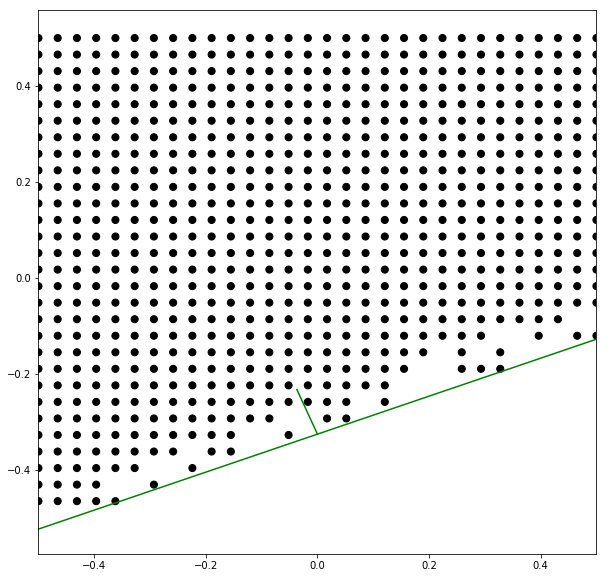

probability of choosing r is 0.0
probability of choosing g is 1.0
probability of choosing b is 0.0
p(y=-1|z="r") is 0.7735191583633423
p(y=-1|z="g") is 0.7410926222801208
p(y=-1|z="b") is 0.7431507110595703


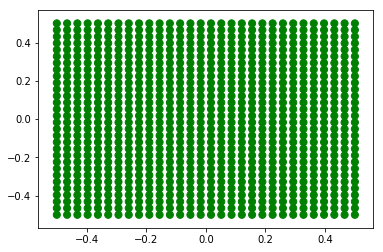

6.73% (0m 12s) 0.5503


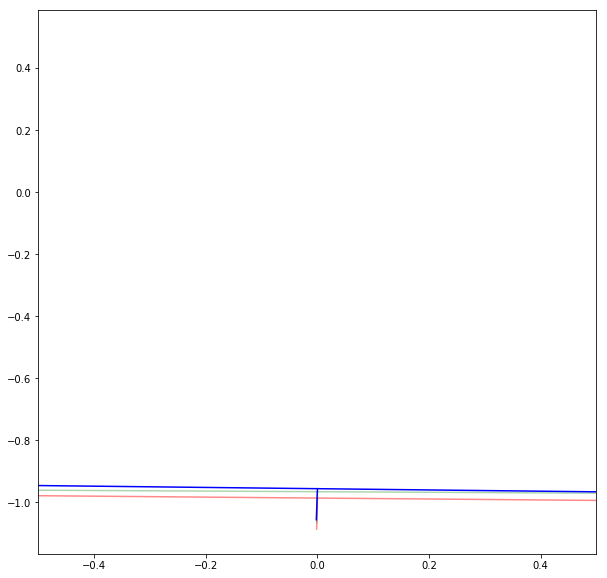

probability of choosing r is 0.259
probability of choosing g is 0.179
probability of choosing b is 0.562
p(y=-1|z="r") is 0.7477477192878723
p(y=-1|z="g") is 0.7645348906517029
p(y=-1|z="b") is 0.7399380803108215


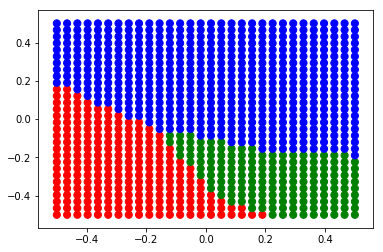

13.40% (0m 23s) 0.5492


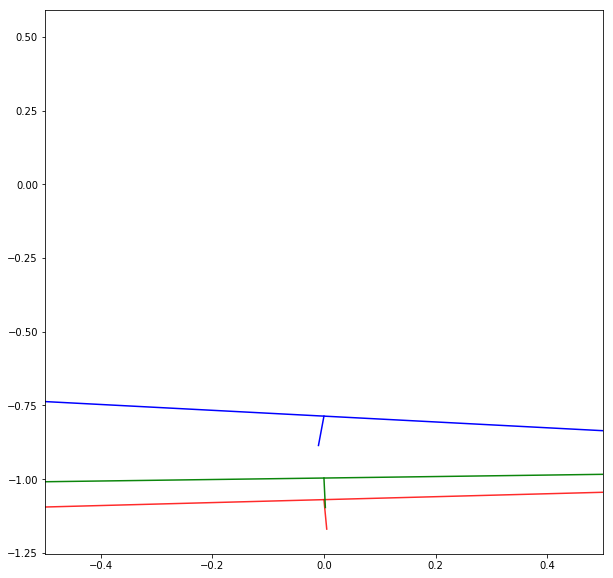

probability of choosing r is 0.299
probability of choosing g is 0.342
probability of choosing b is 0.359
p(y=-1|z="r") is 0.7544910311698914
p(y=-1|z="g") is 0.7250755429267883
p(y=-1|z="b") is 0.7731343507766724


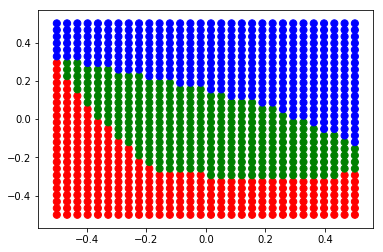

20.07% (0m 34s) 0.4735


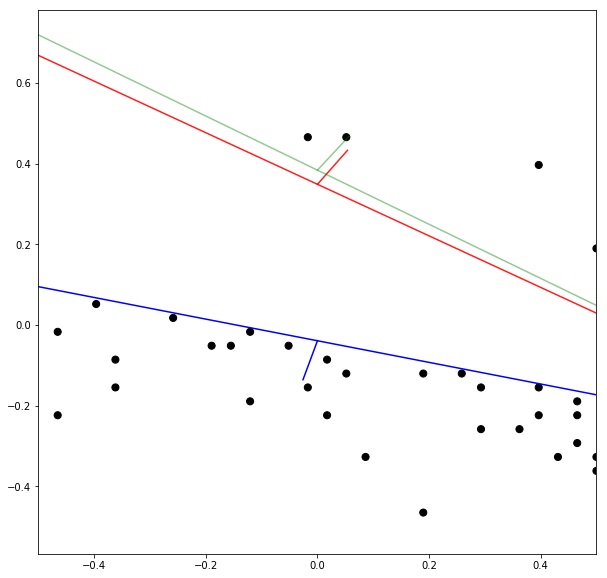

probability of choosing r is 0.38
probability of choosing g is 0.185
probability of choosing b is 0.435
p(y=-1|z="r") is 0.6878980994224548
p(y=-1|z="g") is 0.6590909361839294
p(y=-1|z="b") is 0.8783068656921387


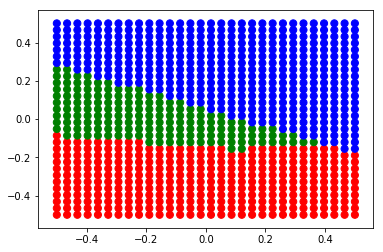

26.73% (0m 45s) 0.3550


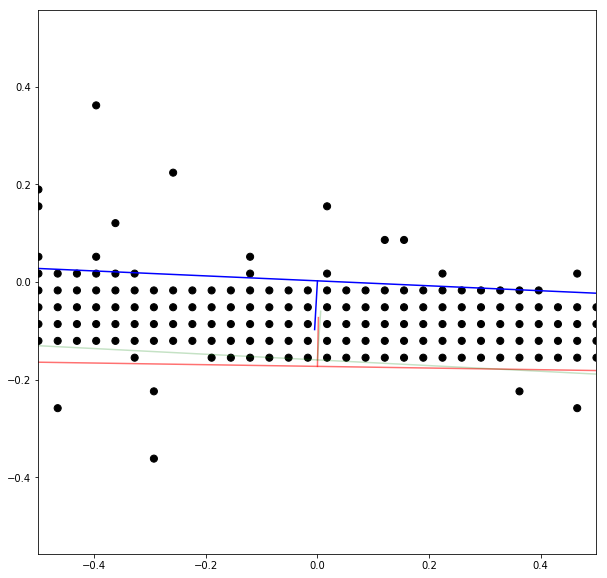

probability of choosing r is 0.312
probability of choosing g is 0.127
probability of choosing b is 0.561
p(y=-1|z="r") is 0.6707819104194641
p(y=-1|z="g") is 0.6652892827987671
p(y=-1|z="b") is 0.829126238822937


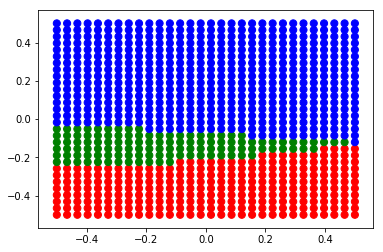

33.40% (0m 54s) 0.3213


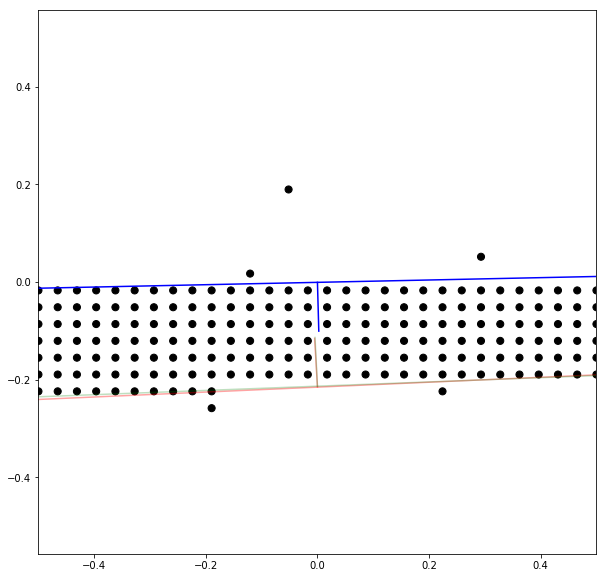

probability of choosing r is 0.224
probability of choosing g is 0.156
probability of choosing b is 0.62
p(y=-1|z="r") is 0.7758620977401733
p(y=-1|z="g") is 0.6759259104728699
p(y=-1|z="b") is 0.7704917788505554


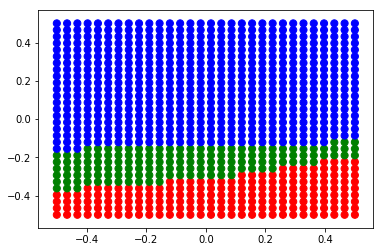

40.07% (1m 4s) 0.3049


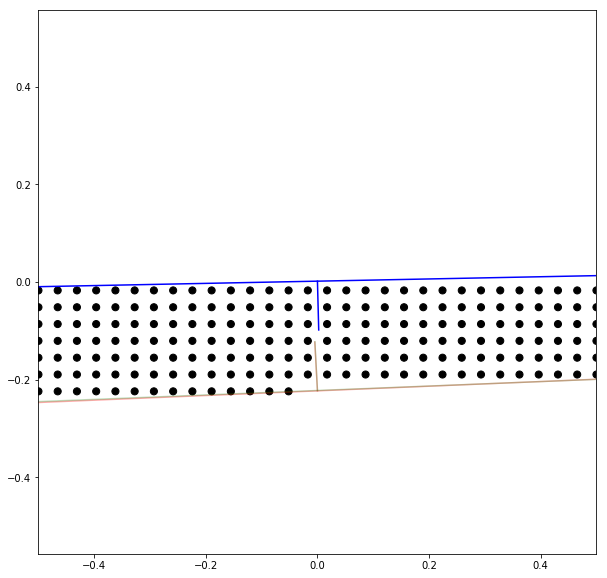

probability of choosing r is 0.207
probability of choosing g is 0.16
probability of choosing b is 0.633
p(y=-1|z="r") is 0.7582417726516724
p(y=-1|z="g") is 0.7272727489471436
p(y=-1|z="b") is 0.7564516067504883


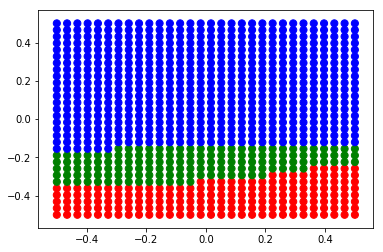

46.73% (1m 14s) 0.3100


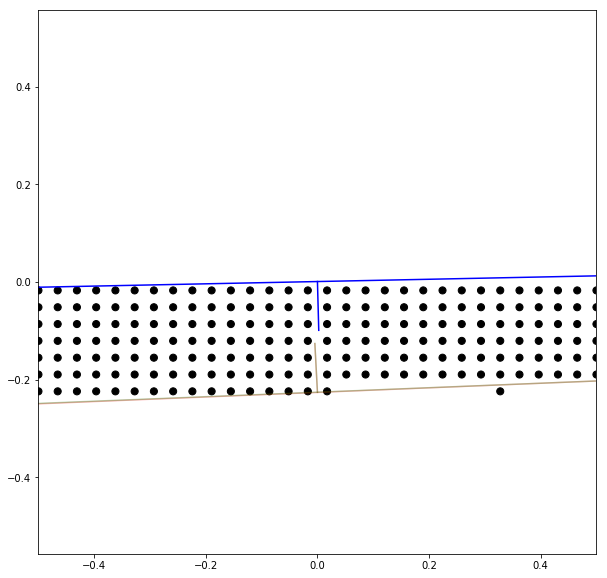

probability of choosing r is 0.187
probability of choosing g is 0.177
probability of choosing b is 0.636
p(y=-1|z="r") is 0.7745664715766907
p(y=-1|z="g") is 0.711442768573761
p(y=-1|z="b") is 0.7571884989738464


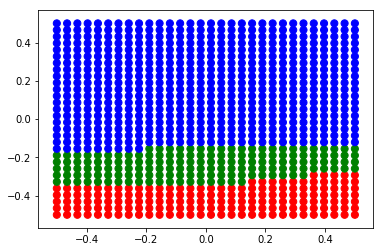

53.40% (1m 24s) 0.3025


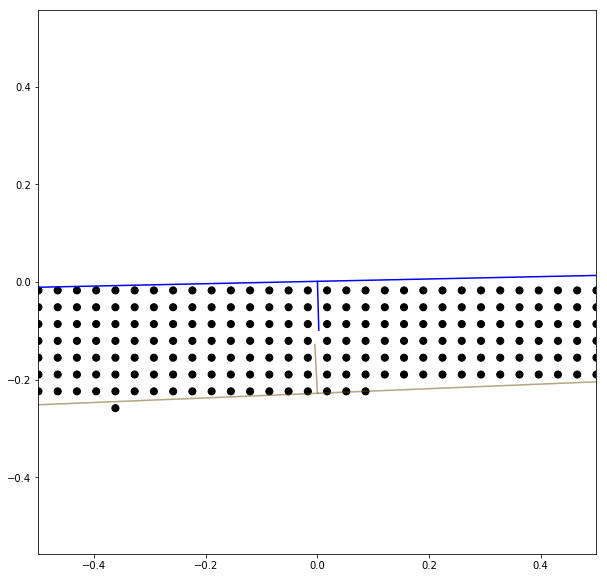

probability of choosing r is 0.17
probability of choosing g is 0.192
probability of choosing b is 0.638
p(y=-1|z="r") is 0.8079096078872681
p(y=-1|z="g") is 0.6979166865348816
p(y=-1|z="b") is 0.7511885762214661


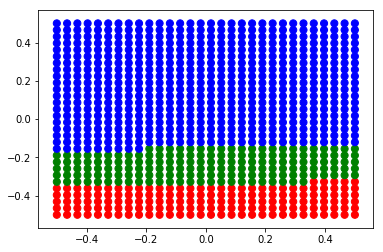

60.07% (1m 33s) 0.2972


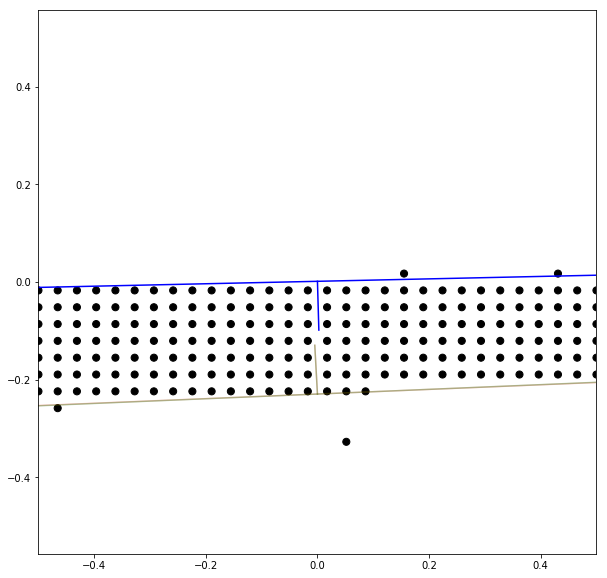

probability of choosing r is 0.162
probability of choosing g is 0.201
probability of choosing b is 0.637
p(y=-1|z="r") is 0.6930692791938782
p(y=-1|z="g") is 0.7513513565063477
p(y=-1|z="b") is 0.76998370885849


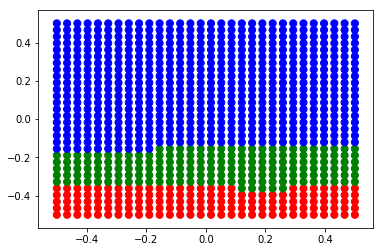

66.73% (1m 44s) 0.3052


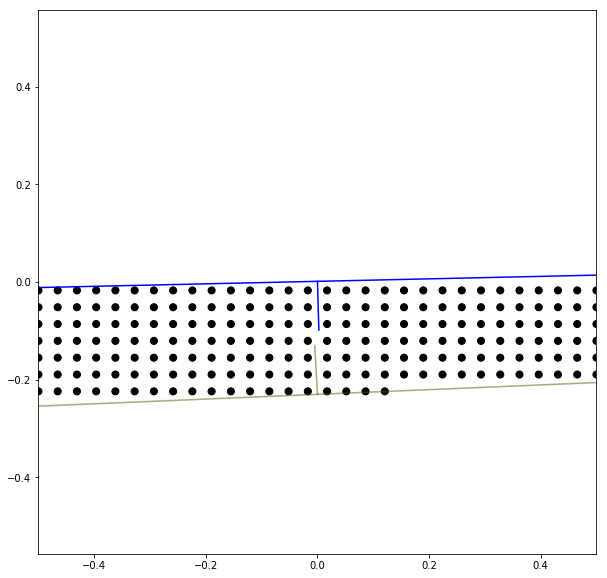

probability of choosing r is 0.127
probability of choosing g is 0.237
probability of choosing b is 0.636
p(y=-1|z="r") is 0.7052023410797119
p(y=-1|z="g") is 0.7799999713897705
p(y=-1|z="b") is 0.7543859481811523


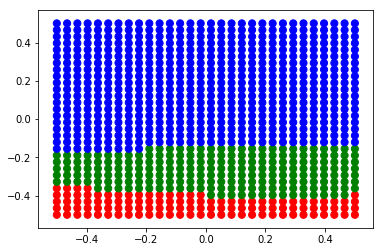

73.40% (1m 53s) 0.2923


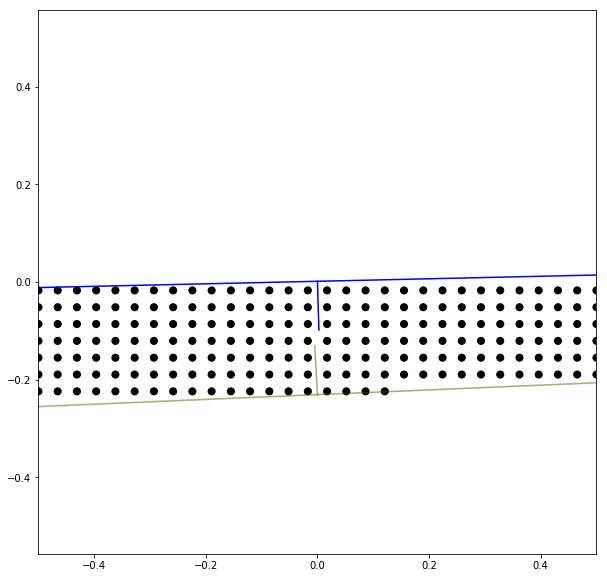

probability of choosing r is 0.131
probability of choosing g is 0.234
probability of choosing b is 0.635
p(y=-1|z="r") is 0.7204301357269287
p(y=-1|z="g") is 0.7552083134651184
p(y=-1|z="b") is 0.7588424682617188


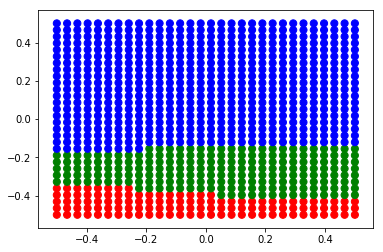

80.07% (2m 3s) 0.2916


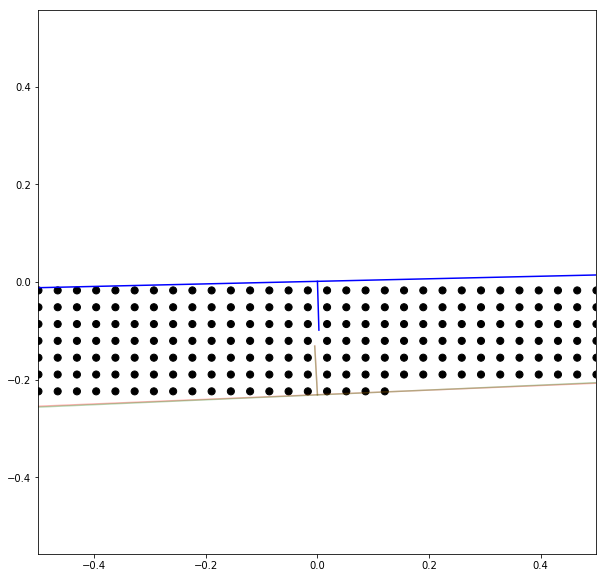

probability of choosing r is 0.186
probability of choosing g is 0.179
probability of choosing b is 0.635
p(y=-1|z="r") is 0.7149758338928223
p(y=-1|z="g") is 0.7616279125213623
p(y=-1|z="b") is 0.760064423084259


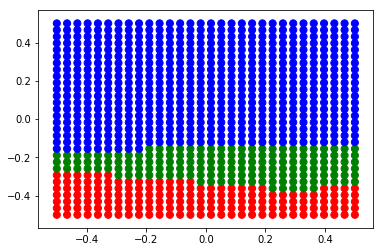

86.73% (2m 12s) 0.3028


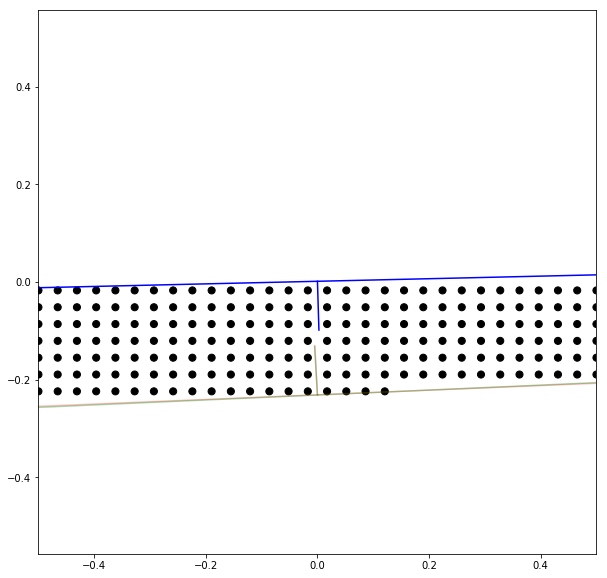

probability of choosing r is 0.162
probability of choosing g is 0.207
probability of choosing b is 0.631
p(y=-1|z="r") is 0.7272727489471436
p(y=-1|z="g") is 0.7661691308021545
p(y=-1|z="b") is 0.7528089880943298


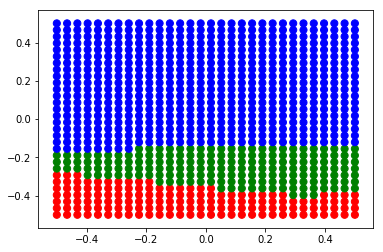

93.40% (2m 22s) 0.2901


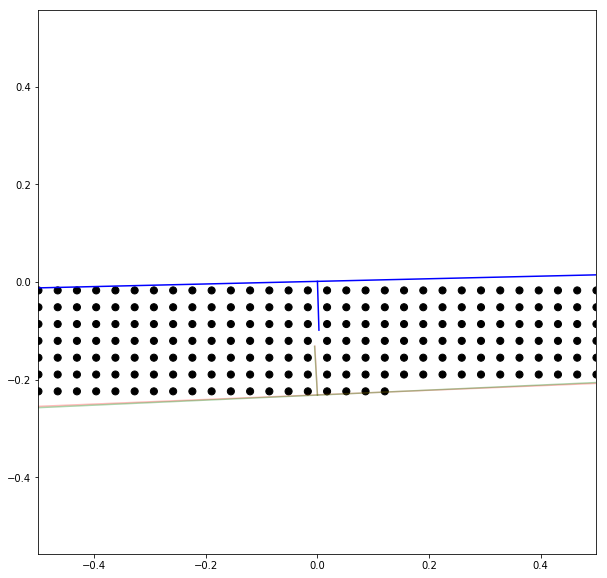

probability of choosing r is 0.168
probability of choosing g is 0.205
probability of choosing b is 0.627
p(y=-1|z="r") is 0.7564767003059387
p(y=-1|z="g") is 0.6891191601753235
p(y=-1|z="b") is 0.7687296271324158


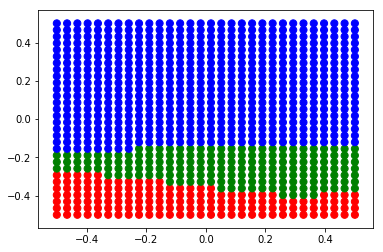

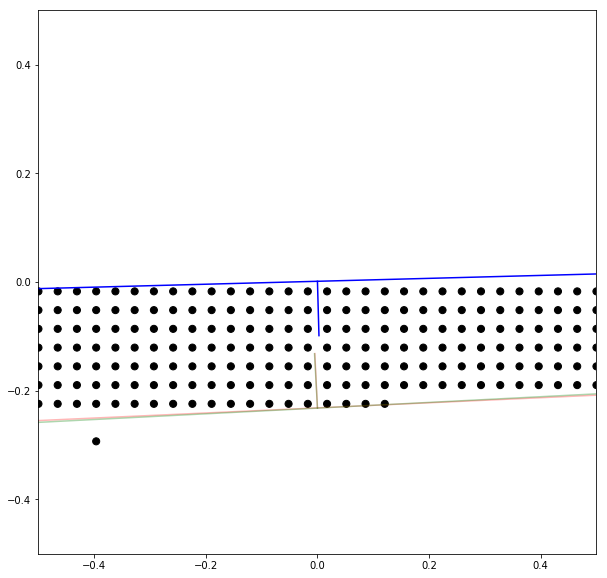

probability of choosing r is 0.176
probability of choosing g is 0.198
probability of choosing b is 0.626
p(y=-1|z="r") is 0.75789475440979
p(y=-1|z="g") is 0.6894736886024475
p(y=-1|z="b") is 0.7677419185638428


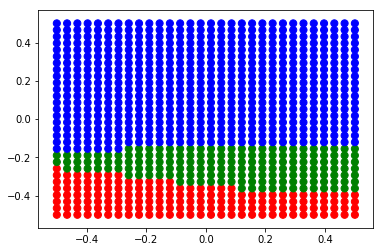

[0.7196364998817444,
 0.5503368973731995,
 0.5492060780525208,
 0.47350507974624634,
 0.3550272285938263,
 0.3212536573410034,
 0.3049164116382599,
 0.30995848774909973,
 0.3025153875350952,
 0.29718267917633057,
 0.30520227551460266,
 0.29230380058288574,
 0.2915613353252411,
 0.3027956783771515,
 0.2900943160057068]

In [6]:
input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

max_grad = 40
alpha = -0.2 # -0.5
beta = -alpha # 0.7
log_name = 'triangle_test' + '_a' + str(alpha) + '_b' + str(beta) + '_s' + str(switch_size)
silence = False
t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                          log_name=log_name, max_grad=max_grad, silence=silence)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=n, shuffle=True)

t.fit(data, n_epochs=1500, print_every=100)

In [7]:
input_size = 2 # 2d input
switch_size = 3 # can only output 3 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

max_grad = 0.1
for beta in [0.5, 0.1, 0, 1]:
    alpha = -beta
    switch = Switch(input_size, switch_size)
    weight = Weight(switch_size, input_size+1) # +1 for b in linear model

    log_name = 'triangle_test_small' + '_b' + str(beta) + '_s' + str(switch_size)
    silence = True
    t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                              log_name=log_name, max_grad=max_grad, silence=silence)

    # fit a model here:
    train_data = TensorDataset(x.data, y.data)
    data = DataLoader(train_data, batch_size=n, shuffle=True)

    t.fit(data, n_epochs=1500, print_every=100)

0.07% (0m 0s) 0.7388
6.73% (0m 10s) 0.5502
13.40% (0m 19s) 0.5466
20.07% (0m 29s) 0.4999
26.73% (0m 38s) 0.4126
33.40% (0m 48s) 0.3590
40.07% (0m 58s) 0.3304
46.73% (1m 7s) 0.2499
53.40% (1m 17s) 0.1240
60.07% (1m 28s) 0.0808
66.73% (1m 37s) 0.0549
73.40% (1m 47s) 0.0891
80.07% (1m 57s) 0.0538
86.73% (2m 6s) 0.0767
93.40% (2m 16s) 0.0245
0.07% (0m 0s) 0.6773
6.73% (0m 10s) 0.5495
13.40% (0m 19s) 0.5023
20.07% (0m 29s) 0.3725
26.73% (0m 38s) 0.3420
33.40% (0m 48s) 0.3111
40.07% (0m 58s) 0.3007
46.73% (1m 7s) 0.3116
53.40% (1m 17s) 0.3031
60.07% (1m 27s) 0.2989
66.73% (1m 36s) 0.2957
73.40% (1m 48s) 0.2880
80.07% (1m 57s) 0.2898
86.73% (2m 7s) 0.2880
93.40% (2m 17s) 0.2999
0.07% (0m 0s) 0.6712
6.73% (0m 9s) 0.5498
13.40% (0m 19s) 0.5190
20.07% (0m 29s) 0.3732
26.73% (0m 38s) 0.3221
33.40% (0m 48s) 0.2923
40.07% (0m 57s) 0.2843
46.73% (1m 9s) 0.2721
53.40% (1m 19s) 0.2569
60.07% (1m 28s) 0.2399
66.73% (1m 38s) 0.2321
73.40% (1m 47s) 0.2255
80.07% (1m 58s) 0.2078
86.73% (2m 8s) 0.1672
93.4

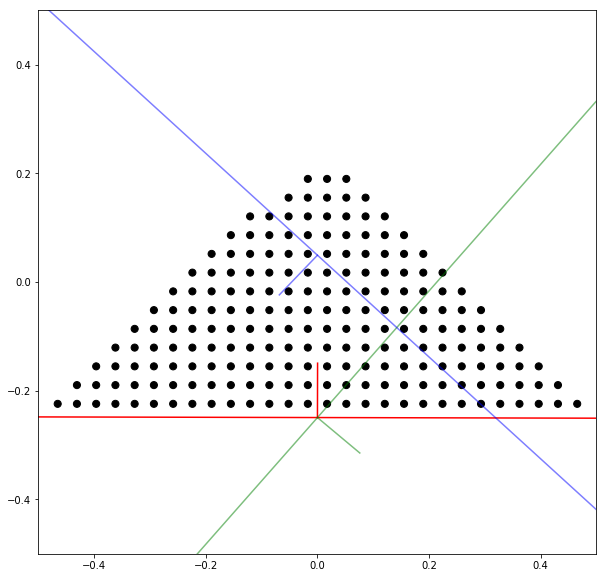

probability of choosing r is 0.497
probability of choosing g is 0.251
probability of choosing b is 0.252
p(y=-1|z="r") is 0.5201612710952759
p(y=-1|z="g") is 1.0
p(y=-1|z="b") is 0.9880478382110596


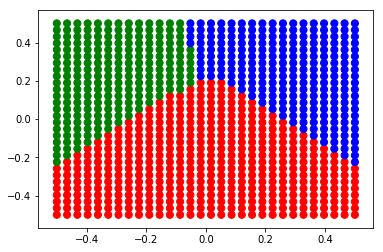

In [18]:
t.plot(to_var(x.data), to_var(y.data), inrange=True)

## rectangle world

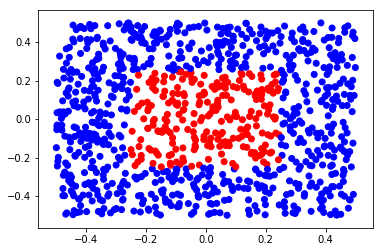

In [34]:
def build_square(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[-1,0,-0.25], [1, 0, -0.25], [0, -1, -0.25], [0, 1, -0.25]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_square(n)
plotData(X, Y)

In [35]:
input_size = 2 # 2d input
switch_size = 4 # can only output 4 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

max_grad = 0.1
alpha = -0.5 # -0.5
beta = 0.5 # 0.7
log_name = 'square' + '_a' + str(alpha) + '_b' + str(beta) + '_s' + str(switch_size)
silence = False
t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                          log_name=log_name, max_grad=max_grad, silence=silence)

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=n, shuffle=True)

t.fit(data, n_epochs=1000, print_every=100)

0.10% (0m 0s) 0.7044
10.10% (0m 11s) 0.5366
20.10% (0m 22s) 0.3289
30.10% (0m 33s) 0.1252
40.10% (0m 43s) 0.0711
50.10% (0m 56s) 0.0374
inf gradient switchNet
inf gradient switchNet
60.10% (1m 6s) 0.0701
70.10% (1m 18s) 0.0531
80.10% (1m 28s) 0.0294
inf gradient switchNet
inf gradient switchNet
90.10% (1m 39s) 0.0309


[0.7043507099151611,
 0.5366271138191223,
 0.3288778066635132,
 0.12520748376846313,
 0.07108164578676224,
 0.037412308156490326,
 0.07012760639190674,
 0.05312960222363472,
 0.029381055384874344,
 0.03093615546822548]

## 2 rectangle world

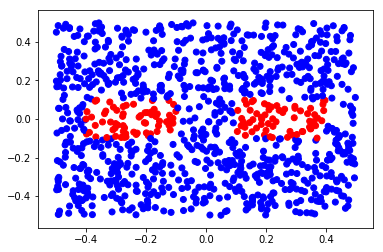

In [2]:
def build_square2(n=10):  
    X = np.random.rand(n, 2)-0.5
#     X1 = np.random.rand(int(n/2), 2)-0.5
#     X2 = np.random.rand(int(n/2), 2)*0.2-0.1
#     X = np.vstack((X1, X2))
    
    # assume l1, l2, and l3 are the parameters of a line
    # e.g. [theta1, theta2, b]: theta1 x1 + theta2 x2 + b <= 0
    lines = [[-1,0,-0.4], [1, 0, 0.1], [0, -1, -0.1], [0, 1, -0.1]]
    y = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y = np.logical_and((X.dot([t1, t2]) + b) <= 0, y)
     
    lines = [[-1,0,0.1], [1, 0, -0.4], [0, -1, -0.1], [0, 1, -0.1]]
    y2 = np.ones(n)
    for l in lines:
        t1, t2, b = l
        y2 = np.logical_and((X.dot([t1, t2]) + b) <= 0, y2)
    
    y = np.logical_or(y, y2)
    
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_square2(n)
plotData(X, Y)

In [5]:
input_size = 2 # 2d input
switch_size = 8 # can only output 8 lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

max_grad = 0.1
for beta in [0.01,0.1,0.5,1]:
    alpha = -beta
    
    switch = Switch(input_size, switch_size)
    weight = Weight(switch_size, input_size+1) # +1 for b in linear model
    
    log_name = 'square2_smallSwitch_Weight3hidden_long' + '_b' + str(beta) + '_s' + str(switch_size)
    silence = True
    t =  InterpretableTrainer(switch, weight, apply_linear, alpha=alpha, beta=beta,
                              log_name=log_name, max_grad=max_grad, silence=silence)

    # fit a model here:
    train_data = TensorDataset(x.data, y.data)
    data = DataLoader(train_data, batch_size=n, shuffle=True)

    t.fit(data, n_epochs=10000, print_every=100)

0.01% (0m 0s) 0.6355
1.01% (0m 18s) 0.3919
2.01% (0m 39s) 0.3918
3.01% (0m 56s) 0.3898
4.01% (1m 14s) 0.3837
5.01% (1m 34s) 0.3059
6.01% (1m 52s) 0.1933
7.01% (2m 10s) 0.1800
8.01% (2m 27s) 0.1701
9.01% (2m 45s) 0.1803
10.01% (3m 3s) 0.1802
11.01% (3m 21s) 0.1714
12.01% (3m 37s) 0.1782
13.01% (3m 54s) 0.1622
14.01% (4m 14s) 0.1513
15.01% (4m 32s) 0.1587
16.01% (4m 49s) 0.1395
17.01% (5m 9s) 0.1401
18.01% (5m 28s) 0.1341
19.01% (5m 49s) 0.1317
20.01% (6m 6s) 0.1313
inf gradient switchNet
inf gradient switchNet
21.01% (6m 23s) 0.1423
22.01% (6m 41s) 0.1173
23.01% (7m 0s) 0.1245
24.01% (7m 18s) 0.1243
25.01% (7m 37s) 0.1219
26.01% (7m 57s) 0.1149
inf gradient switchNet
inf gradient switchNet
27.01% (8m 15s) 0.1291
28.01% (8m 32s) 0.1225
29.01% (8m 49s) 0.1293
30.01% (9m 6s) 0.1126
31.01% (9m 24s) 0.1170
32.01% (9m 41s) 0.1146
33.01% (9m 58s) 0.1209
34.01% (10m 16s) 0.1168
35.01% (10m 32s) 0.1169
inf gradient switchNet
inf gradient switchNet
36.01% (10m 48s) 0.1197
37.01% (11m 6s) 0.1112
3

57.01% (17m 11s) 0.1262
58.01% (17m 28s) 0.1260
59.01% (17m 45s) 0.1263
60.01% (18m 3s) 0.1263
inf gradient switchNet
inf gradient switchNet
61.01% (18m 21s) 0.1215
62.01% (18m 39s) 0.1169
63.01% (18m 57s) 0.0952
inf gradient switchNet
inf gradient switchNet
64.01% (19m 14s) 0.1191
65.01% (19m 32s) 0.1021
66.01% (19m 51s) 0.1122
67.01% (20m 10s) 0.0972
inf gradient switchNet
inf gradient switchNet
68.01% (20m 28s) 0.1095
69.01% (20m 47s) 0.0944
inf gradient switchNet
inf gradient switchNet
70.01% (21m 5s) 0.1092
71.01% (21m 22s) 0.0798
72.01% (21m 40s) 0.1082
inf gradient switchNet
inf gradient switchNet
73.01% (21m 58s) 0.0844
74.01% (22m 16s) 0.1044
75.01% (22m 33s) 0.0974
inf gradient switchNet
inf gradient switchNet
76.01% (22m 50s) 0.0864
77.01% (23m 8s) 0.0882
inf gradient switchNet
inf gradient switchNet
78.01% (23m 27s) 0.0901
79.01% (23m 44s) 0.1016
80.01% (24m 2s) 0.0767
inf gradient switchNet
inf gradient switchNet
81.01% (24m 20s) 0.0860
82.01% (24m 37s) 0.0807
inf gradient

## egg world

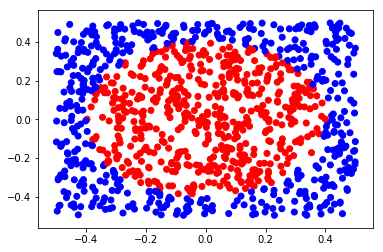

In [5]:
def build_circle(n=10):  
    X = np.random.rand(n, 2)-0.5
    y = (X[:,0]**2 + X[:, 1]**2 <= 0.16)
    return X, y.astype(int) * 2 - 1

def plotData(X, y):
    plt.scatter(X[:,0], X[:,1], c=list(map(lambda x: 'b' if x==-1 else 'r', y)))
    plt.show()

n = 1000
X, Y = build_circle(n)
plotData(X, Y)

0.12% (0m 0s) 0.0007


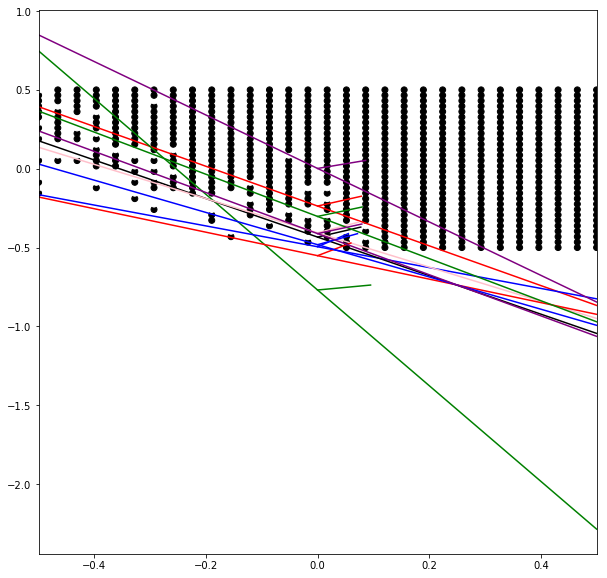

probability of choosing r is 0.0
probability of choosing g is 0.0
probability of choosing b is 0.836
probability of choosing purple is 0.0
probability of choosing k is 0.0
probability of choosing pink is 0.0
probability of choosing r is 0.0
probability of choosing g is 0.164
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.4141414165496826
p(y=-1|z="g") is 0.46464645862579346
p(y=-1|z="b") is 0.5130434632301331
p(y=-1|z="purple") is 0.5287356376647949
p(y=-1|z="k") is 0.46315789222717285
p(y=-1|z="pink") is 0.43421053886413574
p(y=-1|z="r") is 0.5161290168762207
p(y=-1|z="g") is 0.45045045018196106
p(y=-1|z="b") is 0.5600000023841858
p(y=-1|z="purple") is 0.5199999809265137


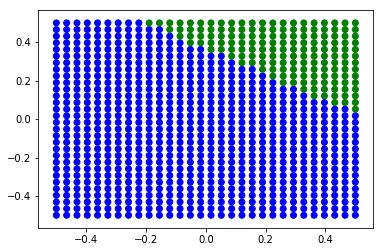

12.62% (0m 17s) 0.0004


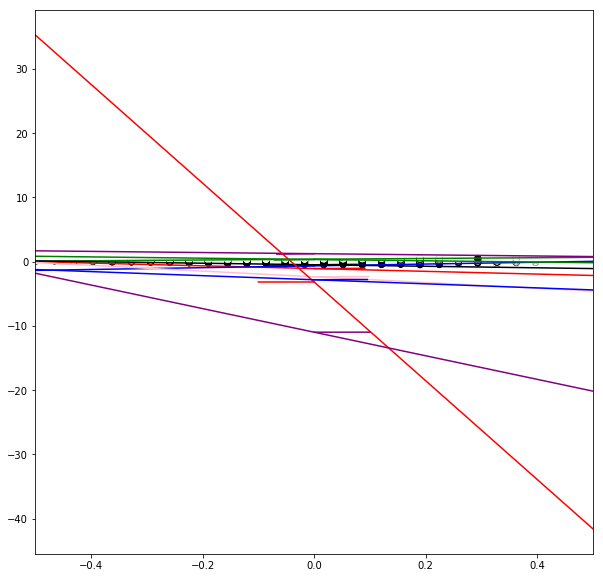

probability of choosing r is 0.0
probability of choosing g is 0.382
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.408
probability of choosing pink is 0.0
probability of choosing r is 0.106
probability of choosing g is 0.104
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.41624364256858826
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.3834586441516876
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.8556700944900513
p(y=-1|z="g") is 0.800000011920929
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


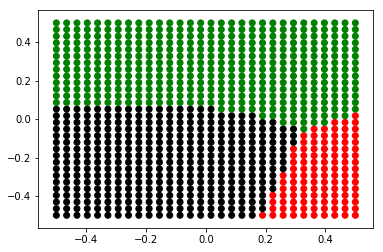

25.12% (0m 33s) 0.0002


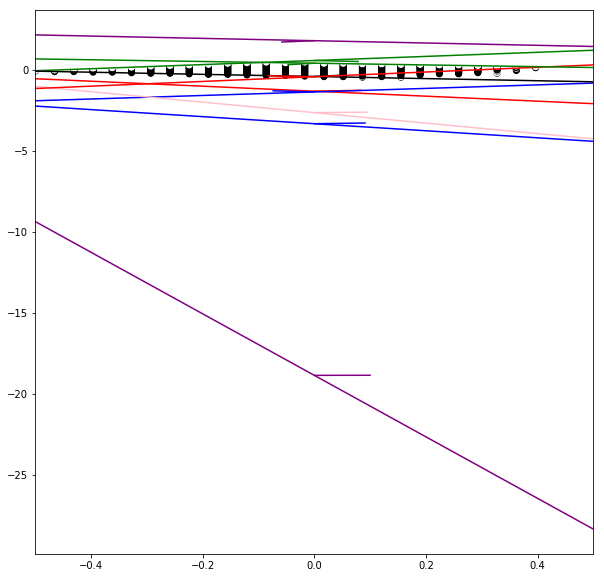

probability of choosing r is 0.0
probability of choosing g is 0.352
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.381
probability of choosing pink is 0.0
probability of choosing r is 0.122
probability of choosing g is 0.145
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.38352271914482117
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.34139785170555115
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.8976377844810486
p(y=-1|z="g") is 0.7516778707504272
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


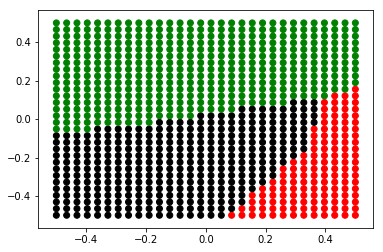

37.62% (0m 50s) 0.0002


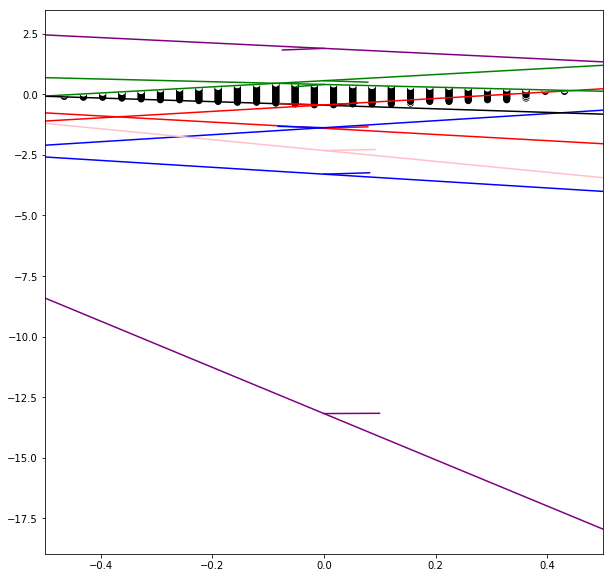

probability of choosing r is 0.0
probability of choosing g is 0.398
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.346
probability of choosing pink is 0.0
probability of choosing r is 0.125
probability of choosing g is 0.131
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.35353535413742065
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.3343023359775543
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.9379844665527344
p(y=-1|z="g") is 0.8549618124961853
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


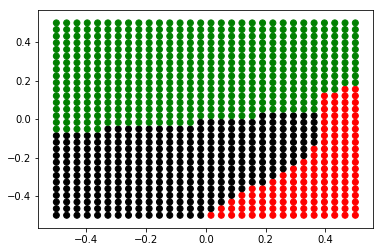

50.12% (1m 6s) 0.0001


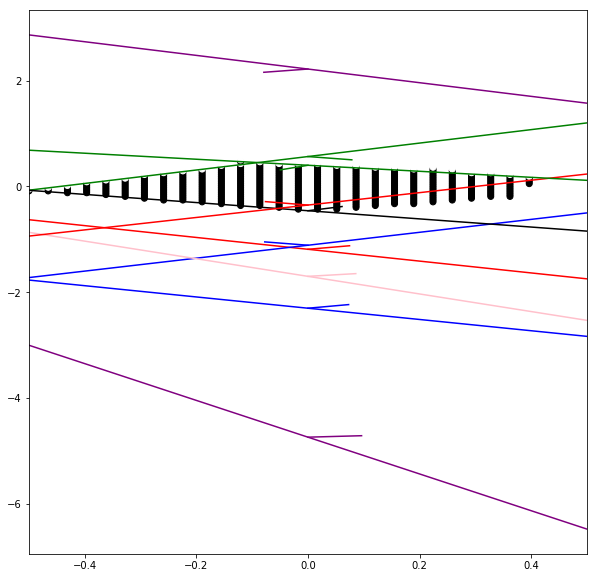

probability of choosing r is 0.0
probability of choosing g is 0.414
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.332
probability of choosing pink is 0.0
probability of choosing r is 0.13
probability of choosing g is 0.124
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.3365384638309479
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.33832335472106934
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.960629940032959
p(y=-1|z="g") is 0.9186992049217224
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


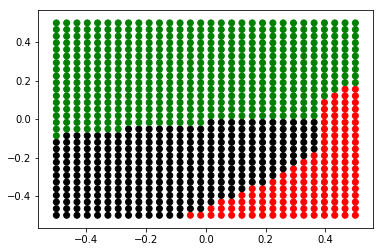

62.62% (1m 24s) 0.0001


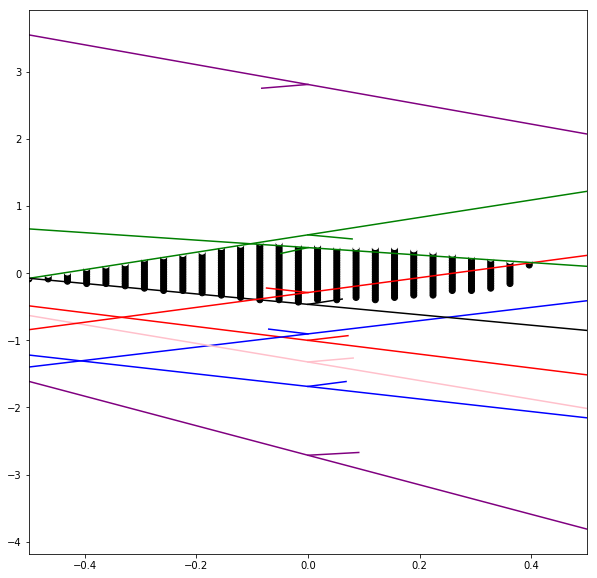

probability of choosing r is 0.0
probability of choosing g is 0.445
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.313
probability of choosing pink is 0.0
probability of choosing r is 0.126
probability of choosing g is 0.116
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.3248259723186493
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.34567901492118835
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.9841269850730896
p(y=-1|z="g") is 0.9411764740943909
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


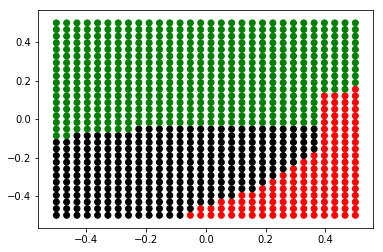

75.12% (1m 41s) 0.0001


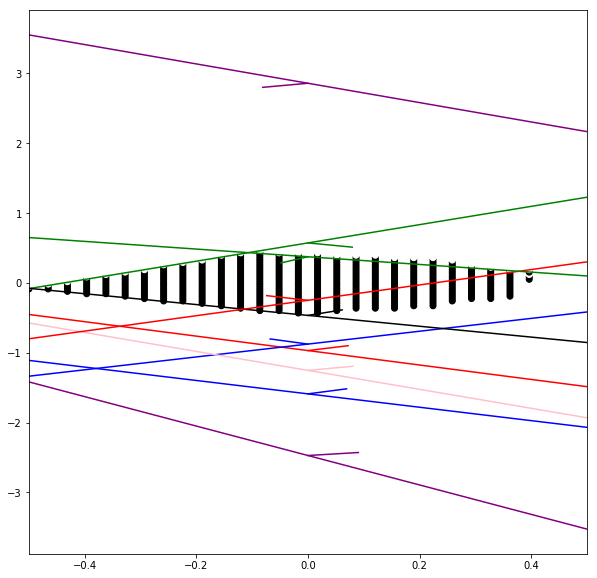

probability of choosing r is 0.0
probability of choosing g is 0.44
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.317
probability of choosing pink is 0.0
probability of choosing r is 0.126
probability of choosing g is 0.117
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.3154362440109253
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.35483869910240173
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 1.0
p(y=-1|z="g") is 0.9491525292396545
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


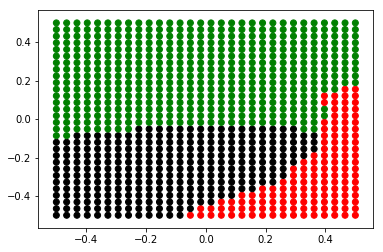

87.62% (1m 59s) 0.0001


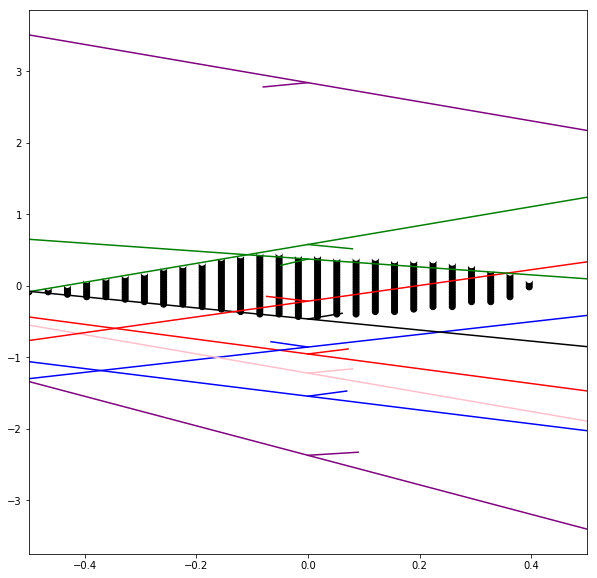

probability of choosing r is 0.0
probability of choosing g is 0.442
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.317
probability of choosing pink is 0.0
probability of choosing r is 0.126
probability of choosing g is 0.115
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.31880733370780945
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.3510971665382385
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.9920634627342224
p(y=-1|z="g") is 0.9411764740943909
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


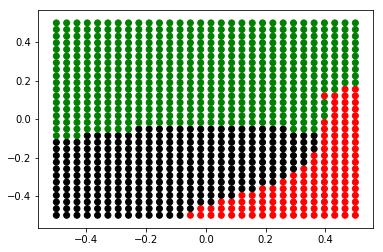

[0.0006930789351463318,
 0.00041377413272857666,
 0.0001958497315645218,
 0.0001723397821187973,
 0.00014813365042209625,
 0.00012920935451984407,
 0.00013357034325599672,
 0.00011174368858337403]

In [6]:
input_size = 2 # 2d input
switch_size = 10 # can only output switch_size lines

x = to_var(torch.from_numpy(X)).float()
y = to_var(torch.from_numpy(Y)).float()

switch = Switch(input_size, switch_size)
weight = Weight(switch_size, input_size+1) # +1 for b in linear model

t =  InterpretableTrainer(switch, weight, apply_linear, alpha=0, beta=0.6,
                         log_name='circle_gradient_clip')

# fit a model here:
train_data = TensorDataset(x.data, y.data)
data = DataLoader(train_data, batch_size=1000, shuffle=True)
t.fit(data, n_epochs=800, print_every=100)

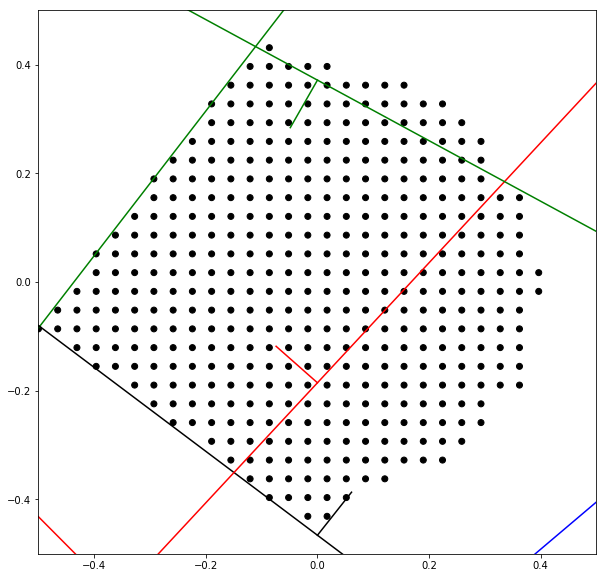

probability of choosing r is 0.0
probability of choosing g is 0.44
probability of choosing b is 0.0
probability of choosing purple is 0.0
probability of choosing k is 0.321
probability of choosing pink is 0.0
probability of choosing r is 0.125
probability of choosing g is 0.114
probability of choosing b is 0.0
probability of choosing purple is 0.0
p(y=-1|z="r") is 0.0
p(y=-1|z="g") is 0.32054176926612854
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0
p(y=-1|z="k") is 0.34700316190719604
p(y=-1|z="pink") is 0.0
p(y=-1|z="r") is 0.9921259880065918
p(y=-1|z="g") is 0.9734513163566589
p(y=-1|z="b") is 0.0
p(y=-1|z="purple") is 0.0


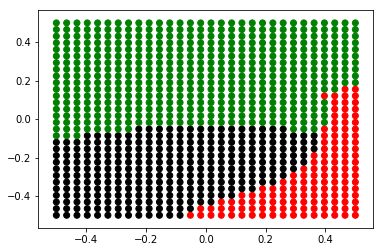

In [7]:
t.plot(to_var(x.data), to_var(y.data), inrange=True)